# Synthetic vs Real Data

This notebook will look at comparing the real platoon data from the constructed data from the CTGAN.

In [109]:
import pandas as pd

In [2]:
df = pd.read_pickle('CeneriData/cleaned_2003_2019_platoon.pkl')

In [116]:
ax_cols = []
for i in range(1, 10):
    ax_cols.append('{}_{}'.format('AX_W', i))
    #for j in range(0, 10):
        #ax_cols.append('{}_{}_{}'.format('AX_W', i, j))

for i in range(1, 10):
    ax_cols.append('{}_{}'.format('AX_DIST', i))
    #for j in range(0, 9):
        #ax_cols.append('{}_{}_{}'.format('AX_DIST', i, j))

df_noax = df.drop(columns = ax_cols)

no_col = []
for col in df.columns:
    if col[-1].isdigit() and int(col[-1]) > 5 and col[1] != 'A':
        no_col.append(col)

df_sm = df.drop(columns=no_col)


In [117]:
#Comparing platoon lengths of 3
df_3 = df_sm[df_sm.Length == 3]
df_3 = df_3.drop(columns='Length')

In [4]:
#Comparing platoon lengths of 5
df_5 = df_sm[df_sm.Length == 5]
df_5 = df_5.drop(columns='Length')

In [5]:
new_cols = []
all_col_names = []
for col in ax_cols:
    if col in df_5.columns:
        col_names = []
        new_df = pd.DataFrame(df_5[col].values.tolist())
        new_df = new_df.drop(columns=len(new_df.columns)-1)
        for i in range(1, len(new_df.columns)+1):
            all_col_names.append('{}_{}'.format(col, i))
            col_names.append('{}_{}'.format(col, i))
        new_df.columns = col_names
        new_cols.append(new_df)

In [6]:
df_5 = df_5.reset_index()

In [7]:
df_5 = df_5.drop(columns=list(set(ax_cols) & set(df_5.columns)))

In [8]:
new_cols.append(df_5)

In [9]:
new_cols

[       AX_W_1_1  AX_W_1_2  AX_W_1_3  AX_W_1_4  AX_W_1_5  AX_W_1_6  AX_W_1_7  \
 0          3739      5792         0         0         0         0         0   
 1          7338     10567      6459      6602      6479         0         0   
 2          1247      2892         0         0         0         0         0   
 3          6142      6490      4916      4824         0         0         0   
 4          7226      9668      5202      4998         0         0         0   
 ...         ...       ...       ...       ...       ...       ...       ...   
 16540      6650      3680      2730         0         0         0         0   
 16541      7100      7100      3130      3130      3060         0         0   
 16542      7380     10140      7070      7220      7380         0         0   
 16543      7180     11060      5110      5810      6090         0         0   
 16544      2500      2090         0         0         0         0         0   
 
        AX_W_1_8  AX_W_1_9  
 0       

In [10]:
df_5 = pd.concat(new_cols, axis=1)

In [10]:
df_5

,AX_W_1_1,AX_W_1_2,AX_W_1_3,AX_W_1_4,AX_W_1_5,AX_W_1_6,AX_W_1_7,AX_W_1_8,AX_W_1_9,AX_W_2_1,...,SPEED_3,SPEED_4,SPEED_5,AX_1,AX_2,AX_3,AX_4,AX_5,Weekday,Hour
0,3739,5792,0,0,0,0,0,0,0,5241,...,8800.0,8400.0,8300.0,2,5.0,5.0,5.0,5.0,4,11
1,7338,10567,6459,6602,6479,0,0,0,0,6306,...,8400.0,8000.0,7800.0,5,5.0,5.0,5.0,5.0,1,8
2,1247,2892,0,0,0,0,0,0,0,6909,...,8600.0,8500.0,8500.0,2,5.0,5.0,5.0,5.0,1,8
3,6142,6490,4916,4824,0,0,0,0,0,6316,...,8900.0,9000.0,8800.0,4,4.0,2.0,5.0,5.0,1,17
4,7226,9668,5202,4998,0,0,0,0,0,6929,...,8900.0,8700.0,9500.0,4,5.0,5.0,5.0,5.0,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16540,6650,3680,2730,0,0,0,0,0,0,8200,...,7700.0,8200.0,8500.0,3,5.0,5.0,5.0,3.0,2,16
16541,7100,7100,3130,3130,3060,0,0,0,0,7400,...,8200.0,8300.0,8400.0,5,4.0,4.0,5.0,4.0,2,17
16542,7380,10140,7070,7220,7380,0,0,0,0,8180,...,8200.0,8000.0,7800.0,5,5.0,5.0,5.0,4.0,3,9
16543,7180,11060,5110,5810,6090,0,0,0,0,7650,...,8700.0,8800.0,8500.0,5,4.0,4.0,4.0,4.0,3,10


In [11]:
import random

ivt_list = ['IVT_1', 'IVT_2', 'IVT_3', 'IVT_4', 'IVT_5']
df_int = df_5.drop(columns=ivt_list).astype(int)
df_5 = pd.concat([df_5[ivt_list], df_int], axis=1)

In [64]:
df_5.columns

Index(['IVT_1', 'IVT_2', 'IVT_3', 'IVT_4', 'IVT_5', 'AX_W_1_1', 'AX_W_1_2',
       'AX_W_1_3', 'AX_W_1_4', 'AX_W_1_5',
       ...
       'SPEED_3', 'SPEED_4', 'SPEED_5', 'AX_1', 'AX_2', 'AX_3', 'AX_4', 'AX_5',
       'Weekday', 'Hour'],
      dtype='object', length=118)

In [3]:
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [61]:
def AX_W_1_3(data):    
    return data.apply(lambda x: x['AX_W_1_3'] if int(x['AX_1']) < 3 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_1_3',
            formula=AX_W_1_3,
            handling_strategy='reject_sampling'
        ))

def AX_W_1_4(data):
    return data.apply(lambda x: x['AX_W_1_4'] if int(x['AX_1']) < 4 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_1_4',
            formula=AX_W_1_4,
            handling_strategy='reject_sampling'
        ))
def AX_W_1_5(data):
    return data.apply(lambda x: x['AX_W_1_5'] if int(x['AX_1']) <5 else 0, axis=1)


zero_funcs.append(ColumnFormula(
            column='AX_W_1_5',
            formula=AX_W_1_5,
            handling_strategy='reject_sampling'
        ))

def AX_W_1_6(data):
    return data.apply(lambda x: x['AX_W_1_6'] if int(x['AX_1']) < 6 else 0, axis=1)


zero_funcs.append(ColumnFormula(
            column='AX_W_1_6',
            formula=AX_W_1_6,
            handling_strategy='reject_sampling'
        ))

def AX_W_1_7(data):
    return data.apply(lambda x: x['AX_W_1_7'] if int(x['AX_1']) < 7 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_1_7',
            formula=AX_W_1_7,
            handling_strategy='reject_sampling'
        ))
def AX_W_1_8(data):
    return data.apply(lambda x: x['AX_W_1_8'] if int(x['AX_1']) < 8 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_1_8',
            formula=AX_W_1_8,
            handling_strategy='reject_sampling'
        ))
def AX_W_1_9(data):
    return data.apply(lambda x: x['AX_W_1_9'] if int(x['AX_1']) < 9 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_1_9',
            formula=AX_W_1_9,
            handling_strategy='reject_sampling'
        ))

def AX_W_2_3(data):
    return data.apply(lambda x: x['AX_W_2_3'] if int(x['AX_2']) < 3 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_2_3',
            formula=AX_W_2_3,
            handling_strategy='reject_sampling'
        ))

def AX_W_2_4(data):
    return data.apply(lambda x: x['AX_W_2_4'] if int(x['AX_2']) < 4 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_2_4',
            formula=AX_W_2_4,
            handling_strategy='reject_sampling'
        ))
def AX_W_2_5(data):
    return data.apply(lambda x: x['AX_W_2_5'] if int(x['AX_2']) < 5 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_2_5',
            formula=AX_W_2_5,
            handling_strategy='reject_sampling'
        ))

def AX_W_2_6(data):
    return data.apply(lambda x: x['AX_W_2_6'] if int(x['AX_2']) < 6 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_2_6',
            formula=AX_W_2_6,
            handling_strategy='reject_sampling'
        ))

def AX_W_2_7(data):
    return data.apply(lambda x: x['AX_W_2_7'] if int(x['AX_2']) < 7 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_2_7',
            formula=AX_W_2_7,
            handling_strategy='reject_sampling'
        ))
def AX_W_2_8(data):
    return data.apply(lambda x: x['AX_W_2_8'] if int(x['AX_2']) < 8 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_2_8',
            formula=AX_W_2_8,
            handling_strategy='reject_sampling'
        ))
def AX_W_2_9(data):
    return data.apply(lambda x: x['AX_W_2_9'] if int(x['AX_2']) < 9 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_2_9',
            formula=AX_W_2_9,
            handling_strategy='reject_sampling'
        ))

def AX_W_3_3(data):
    return data.apply(lambda x: x['AX_W_3_3'] if int(x['AX_3']) < 3 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_3_3',
            formula=AX_W_3_3,
            handling_strategy='reject_sampling'
        ))

def AX_W_3_4(data):
    return data.apply(lambda x: x['AX_W_3_4'] if int(x['AX_3']) < 4 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_3_4',
            formula=AX_W_3_4,
            handling_strategy='reject_sampling'
        ))
def AX_W_3_5(data):
    return data.apply(lambda x: x['AX_W_3_5'] if int(x['AX_3']) < 5 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_3_5',
            formula=AX_W_3_5,
            handling_strategy='reject_sampling'
        ))

def AX_W_3_6(data):
    return data.apply(lambda x: x['AX_W_3_6'] if int(x['AX_3']) < 6 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_3_6',
            formula=AX_W_3_6,
            handling_strategy='reject_sampling'
        ))

def AX_W_3_7(data):
    return data.apply(lambda x: x['AX_W_3_7'] if int(x['AX_3']) < 7 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_3_7',
            formula=AX_W_3_7,
            handling_strategy='reject_sampling'
        ))
def AX_W_3_8(data):
    return data.apply(lambda x: x['AX_W_3_8'] if int(x['AX_3']) < 8 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_3_8',
            formula=AX_W_3_8,
            handling_strategy='reject_sampling'
        ))
def AX_W_3_9(data):
    return data.apply(lambda x: x['AX_W_3_9'] if int(x['AX_3']) < 9 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_3_9',
            formula=AX_W_3_9,
            handling_strategy='reject_sampling'
        ))

def AX_W_4_3(data):
    return data.apply(lambda x: x['AX_W_4_3'] if int(x['AX_4']) < 3 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_4_3',
            formula=AX_W_4_3,
            handling_strategy='reject_sampling'
        ))

def AX_W_4_4(data):
    return data.apply(lambda x: x['AX_W_4_4'] if int(x['AX_4']) < 4 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_4_4',
            formula=AX_W_4_4,
            handling_strategy='reject_sampling'
        ))
def AX_W_4_5(data):
    return data.apply(lambda x: x['AX_W_4_5'] if int(x['AX_4']) < 5 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_4_5',
            formula=AX_W_4_5,
            handling_strategy='reject_sampling'
        ))

def AX_W_4_6(data):
    return data.apply(lambda x: x['AX_W_4_6'] if int(x['AX_4']) < 6 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_4_6',
            formula=AX_W_4_6,
            handling_strategy='reject_sampling'
        ))

def AX_W_4_7(data):
    return data.apply(lambda x: x['AX_W_4_7'] if int(x['AX_4']) < 7 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_4_7',
            formula=AX_W_4_7,
            handling_strategy='reject_sampling'
        ))
def AX_W_4_8(data):
    return data.apply(lambda x: x['AX_W_4_8'] if int(x['AX_4']) < 8 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_4_8',
            formula=AX_W_4_8,
            handling_strategy='reject_sampling'
        ))
def AX_W_4_9(data):
    return data.apply(lambda x: x['AX_W_4_9'] if int(x['AX_4']) < 9 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_4_9',
            formula=AX_W_4_9,
            handling_strategy='reject_sampling'
        ))

def AX_W_5_3(data):
    return data.apply(lambda x: x['AX_W_5_3'] if int(x['AX_5']) < 3 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_5_3',
            formula=AX_W_5_3,
            handling_strategy='reject_sampling'
        ))

def AX_W_5_4(data):
    return data.apply(lambda x: x['AX_W_5_4'] if int(x['AX_5']) < 4 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_5_4',
            formula=AX_W_5_4,
            handling_strategy='reject_sampling'
        ))
def AX_W_5_5(data):
    return data.apply(lambda x: x['AX_W_5_5'] if int(x['AX_5']) < 5 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_5_5',
            formula=AX_W_5_5,
            handling_strategy='reject_sampling'
        ))
def AX_W_5_6(data):
    return data.apply(lambda x: x['AX_W_5_6'] if int(x['AX_5']) < 6 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_5_6',
            formula=AX_W_5_6,
            handling_strategy='reject_sampling'
        ))

def AX_W_5_7(data):
    return data.apply(lambda x: x['AX_W_5_7'] if int(x['AX_5']) < 7 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_5_7',
            formula=AX_W_5_7,
            handling_strategy='reject_sampling'
        ))
def AX_W_5_8(data):
    return data.apply(lambda x: x['AX_W_5_8'] if int(x['AX_5']) < 8 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_5_8',
            formula=AX_W_5_8,
            handling_strategy='reject_sampling'
        ))

def AX_W_5_9(data):
    return data.apply(lambda x: x['AX_W_5_9'] if int(x['AX_5']) < 9 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_W_5_9',
            formula=AX_W_5_9,
            handling_strategy='reject_sampling'
        ))


#Distance formulas
def AX_DIST_1_2(data):
    return data.apply(lambda x: x['AX_DIST_1_2'] if int(x['AX_1']) < 2 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_1_2',
            formula=AX_DIST_1_2,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_1_3(data):
    return data.apply(lambda x: x['AX_DIST_1_3'] if int(x['AX_1']) < 3 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_1_3',
            formula=AX_DIST_1_3,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_1_4(data):
    return data.apply(lambda x: x['AX_DIST_1_4'] if int(x['AX_1']) < 4 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_1_4',
            formula=AX_DIST_1_4,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_1_5(data):
    return data.apply(lambda x: x['AX_DIST_1_5'] if int(x['AX_1']) < 5 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_1_5',
            formula=AX_DIST_1_5,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_1_6(data):
    return data.apply(lambda x: x['AX_DIST_1_6'] if int(x['AX_1']) < 6 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_1_6',
            formula=AX_DIST_1_6,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_1_7(data):
    return data.apply(lambda x: x['AX_DIST_1_7'] if int(x['AX_1']) < 7 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_1_7',
            formula=AX_DIST_1_7,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_1_8(data):
    return data.apply(lambda x: x['AX_DIST_1_8'] if int(x['AX_1']) < 8 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_1_8',
            formula=AX_DIST_1_8,
            handling_strategy='reject_sampling'
        ))

def AX_DIST_2_2(data):
    return data.apply(lambda x: x['AX_DIST_2_2'] if int(x['AX_2']) < 2 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_2_2',
            formula=AX_DIST_2_2,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_2_3(data):
    return data.apply(lambda x: x['AX_DIST_2_3'] if int(x['AX_2']) < 3 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_2_3',
            formula=AX_DIST_2_3,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_2_4(data):
    return data.apply(lambda x: x['AX_DIST_2_4'] if int(x['AX_2']) < 4 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_2_4',
            formula=AX_DIST_2_4,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_2_5(data):
    return data.apply(lambda x: x['AX_DIST_2_5'] if int(x['AX_2']) < 5 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_2_5',
            formula=AX_DIST_2_5,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_2_6(data):
    return data.apply(lambda x: x['AX_DIST_2_6'] if int(x['AX_2']) < 6 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_2_6',
            formula=AX_DIST_2_6,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_2_7(data):
    return data.apply(lambda x: x['AX_DIST_2_7'] if int(x['AX_2']) < 7 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_2_7',
            formula=AX_DIST_2_7,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_2_8(data):
    return data.apply(lambda x: x['AX_DIST_2_8'] if int(x['AX_2']) < 8 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_2_8',
            formula=AX_DIST_2_8,
            handling_strategy='reject_sampling'
        ))

def AX_DIST_3_2(data):
    return data.apply(lambda x: x['AX_DIST_3_2'] if int(x['AX_3']) < 2 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_3_2',
            formula=AX_DIST_3_2,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_3_3(data):
    return data.apply(lambda x: x['AX_DIST_3_3'] if int(x['AX_3']) < 3 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_3_3',
            formula=AX_DIST_3_3,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_3_4(data):
    return data.apply(lambda x: x['AX_DIST_3_4'] if int(x['AX_3']) < 4 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_3_4',
            formula=AX_DIST_3_4,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_3_5(data):
    return data.apply(lambda x: x['AX_DIST_3_5'] if int(x['AX_3']) < 5 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_3_5',
            formula=AX_DIST_3_5,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_3_6(data):
    return data.apply(lambda x: x['AX_DIST_3_6'] if int(x['AX_3']) < 6 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_3_6',
            formula=AX_DIST_3_6,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_3_7(data):
    return data.apply(lambda x: x['AX_DIST_3_7'] if int(x['AX_3']) < 7 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_3_7',
            formula=AX_DIST_3_7,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_3_8(data):
    return data.apply(lambda x: x['AX_DIST_3_8'] if int(x['AX_3']) < 8 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_3_8',
            formula=AX_DIST_3_8,
            handling_strategy='reject_sampling'
        ))

def AX_DIST_4_2(data):
    return data.apply(lambda x: x['AX_DIST_4_2'] if int(x['AX_4']) < 2 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_4_2',
            formula=AX_DIST_4_2,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_4_3(data):
    return data.apply(lambda x: x['AX_DIST_4_3'] if int(x['AX_4']) < 3 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_4_3',
            formula=AX_DIST_4_3,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_4_4(data):
    return data.apply(lambda x: x['AX_DIST_4_4'] if int(x['AX_4']) < 4 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_4_4',
            formula=AX_DIST_4_4,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_4_5(data):
    return data.apply(lambda x: x['AX_DIST_4_5'] if int(x['AX_4']) < 5 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_4_5',
            formula=AX_DIST_4_5,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_4_6(data):
    return data.apply(lambda x: x['AX_DIST_4_6'] if int(x['AX_4']) < 6 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_4_6',
            formula=AX_DIST_4_6,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_4_7(data):
    return data.apply(lambda x: x['AX_DIST_4_7'] if int(x['AX_4']) < 7 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_4_7',
            formula=AX_DIST_4_7,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_4_8(data):
    return data.apply(lambda x: x['AX_DIST_4_8'] if int(x['AX_4']) < 8 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_4_8',
            formula=AX_DIST_4_8,
            handling_strategy='reject_sampling'
        ))

def AX_DIST_5_2(data):
    return data.apply(lambda x: x['AX_DIST_5_2'] if int(x['AX_5']) < 2 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_5_2',
            formula=AX_DIST_5_2,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_5_3(data):
    return data.apply(lambda x: x['AX_DIST_5_3'] if int(x['AX_5']) < 3 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_5_3',
            formula=AX_DIST_5_3,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_5_4(data):
    return data.apply(lambda x: x['AX_DIST_5_4'] if int(x['AX_5']) < 4 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_5_4',
            formula=AX_DIST_5_4,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_5_5(data):
    return data.apply(lambda x: x['AX_DIST_5_5'] if int(x['AX_5']) < 5 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_5_5',
            formula=AX_DIST_5_5,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_5_6(data):
    return data.apply(lambda x: x['AX_DIST_5_6'] if int(x['AX_5']) < 6 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_5_6',
            formula=AX_DIST_5_6,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_5_7(data):
    return data.apply(lambda x: x['AX_DIST_5_7'] if int(x['AX_5']) < 7 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_5_7',
            formula=AX_DIST_5_7,
            handling_strategy='reject_sampling'
        ))
def AX_DIST_5_8(data):
    return data.apply(lambda x: x['AX_DIST_5_8'] if int(x['AX_5']) < 8 else 0, axis=1)

zero_funcs.append(ColumnFormula(
            column='AX_DIST_5_8',
            formula=AX_DIST_5_8,
            handling_strategy='reject_sampling'
        ))

In [14]:
from sdv.constraints import UniqueCombinations

In [74]:
zero_funcs =[]

In [75]:
zero_funcs.append( UniqueCombinations(
        columns=['CLASS_1', 'AX_1'],
        handling_strategy='reject_sampling'
    ) )
zero_funcs.append( UniqueCombinations(
        columns=['CLASS_2', 'AX_2'],
        handling_strategy='reject_sampling'
    ) )
zero_funcs.append(UniqueCombinations(
        columns=['CLASS_3', 'AX_3'],
        handling_strategy='reject_sampling'
    ) )
zero_funcs.append(UniqueCombinations(
        columns=['CLASS_4', 'AX_4'],
        handling_strategy='reject_sampling'
    ) )
zero_funcs.append(UniqueCombinations(
        columns=['CLASS_5', 'AX_5'],
        handling_strategy='reject_sampling'
    ) )

In [14]:
str_col = ['CLASS_1', 'CLASS_2','CLASS_3','CLASS_4','CLASS_5','AX_1','AX_2','AX_3','AX_4','AX_5','Weekday','Hour']

In [15]:
field_types ={}
for col in df_5.columns:
    if col in str_col:
        field_types[col] = {'type': 'categorical'}
    else:
        field_types[col] = {'type': 'numerical'}

In [16]:
categories = {}
for col in str_col:
    categories[col] = 'one_hot_encoding'

In [113]:
df_5 = df_5.drop(columns='test')
print(df_5.columns.tolist())

['IVT_1', 'IVT_2', 'IVT_3', 'IVT_4', 'IVT_5', 'AX_W_1_1', 'AX_W_1_2', 'AX_W_1_3', 'AX_W_1_4', 'AX_W_1_5', 'AX_W_1_6', 'AX_W_1_7', 'AX_W_1_8', 'AX_W_1_9', 'AX_W_2_1', 'AX_W_2_2', 'AX_W_2_3', 'AX_W_2_4', 'AX_W_2_5', 'AX_W_2_6', 'AX_W_2_7', 'AX_W_2_8', 'AX_W_2_9', 'AX_W_3_1', 'AX_W_3_2', 'AX_W_3_3', 'AX_W_3_4', 'AX_W_3_5', 'AX_W_3_6', 'AX_W_3_7', 'AX_W_3_8', 'AX_W_3_9', 'AX_W_4_1', 'AX_W_4_2', 'AX_W_4_3', 'AX_W_4_4', 'AX_W_4_5', 'AX_W_4_6', 'AX_W_4_7', 'AX_W_4_8', 'AX_W_4_9', 'AX_W_5_1', 'AX_W_5_2', 'AX_W_5_3', 'AX_W_5_4', 'AX_W_5_5', 'AX_W_5_6', 'AX_W_5_7', 'AX_W_5_8', 'AX_W_5_9', 'AX_DIST_1_1', 'AX_DIST_1_2', 'AX_DIST_1_3', 'AX_DIST_1_4', 'AX_DIST_1_5', 'AX_DIST_1_6', 'AX_DIST_1_7', 'AX_DIST_1_8', 'AX_DIST_2_1', 'AX_DIST_2_2', 'AX_DIST_2_3', 'AX_DIST_2_4', 'AX_DIST_2_5', 'AX_DIST_2_6', 'AX_DIST_2_7', 'AX_DIST_2_8', 'AX_DIST_3_1', 'AX_DIST_3_2', 'AX_DIST_3_3', 'AX_DIST_3_4', 'AX_DIST_3_5', 'AX_DIST_3_6', 'AX_DIST_3_7', 'AX_DIST_3_8', 'AX_DIST_4_1', 'AX_DIST_4_2', 'AX_DIST_4_3', 'AX_DIST_

In [29]:
df_5[str_col].dtypes

CLASS_1    object
CLASS_2    object
CLASS_3    object
CLASS_4    object
CLASS_5    object
AX_1       object
AX_2       object
AX_3       object
AX_4       object
AX_5       object
Weekday    object
Hour       object
dtype: object

In [17]:
df_str = df_5[str_col].astype(str)
df_5 = pd.concat([df_5.drop(columns=str_col), df_str], axis=1)

In [21]:
import ctgan

In [18]:
from sdv.tabular import CTGAN

In [19]:
ctgan_con = CTGAN(field_transformers=categories, field_types=field_types)

In [19]:
categories

{'CLASS_1': 'one_hot_encoding',
 'CLASS_2': 'one_hot_encoding',
 'CLASS_3': 'one_hot_encoding',
 'CLASS_4': 'one_hot_encoding',
 'CLASS_5': 'one_hot_encoding',
 'AX_1': 'one_hot_encoding',
 'AX_2': 'one_hot_encoding',
 'AX_3': 'one_hot_encoding',
 'AX_4': 'one_hot_encoding',
 'AX_5': 'one_hot_encoding',
 'Weekday': 'one_hot_encoding',
 'Hour': 'one_hot_encoding'}

In [20]:
field_types

{'IVT_1': {'type': 'numerical', 'transformer': 'float'},
 'IVT_2': {'type': 'numerical', 'transformer': 'float'},
 'IVT_3': {'type': 'numerical', 'transformer': 'float'},
 'IVT_4': {'type': 'numerical', 'transformer': 'float'},
 'IVT_5': {'type': 'numerical', 'transformer': 'float'},
 'AX_W_1_1': {'type': 'numerical', 'transformer': 'float'},
 'AX_W_1_2': {'type': 'numerical', 'transformer': 'float'},
 'AX_W_1_3': {'type': 'numerical', 'transformer': 'float'},
 'AX_W_1_4': {'type': 'numerical', 'transformer': 'float'},
 'AX_W_1_5': {'type': 'numerical', 'transformer': 'float'},
 'AX_W_1_6': {'type': 'numerical', 'transformer': 'float'},
 'AX_W_1_7': {'type': 'numerical', 'transformer': 'float'},
 'AX_W_1_8': {'type': 'numerical', 'transformer': 'float'},
 'AX_W_1_9': {'type': 'numerical', 'transformer': 'float'},
 'AX_W_2_1': {'type': 'numerical', 'transformer': 'float'},
 'AX_W_2_2': {'type': 'numerical', 'transformer': 'float'},
 'AX_W_2_3': {'type': 'numerical', 'transformer': 'floa

In [ ]:
ctgan_con.fit(df_5)

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/pum

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/pum

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X

In [ ]:
ctgan_con.save('CTGAN_Models/ctgan_length5_all_dayall_epoch300.pkl')

In [22]:
samp = ctgan_con.sample(10000)

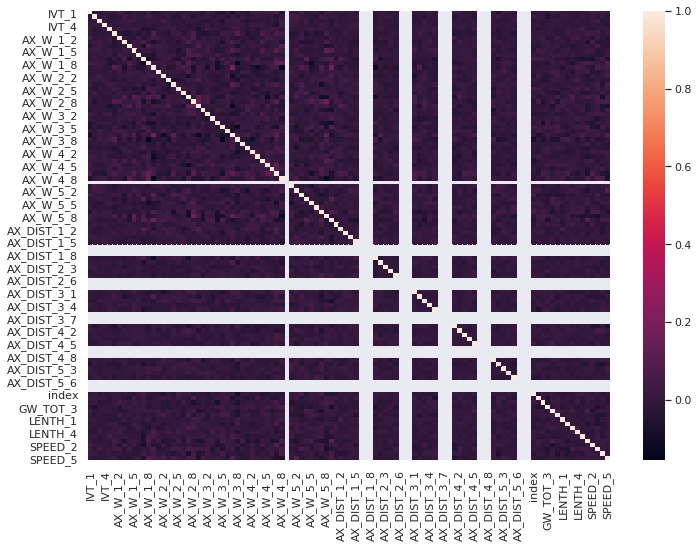

In [23]:
sns.heatmap(samp.corr())

In [ ]:
samp.isnull().sum().sum()

In [45]:
ctgan_non = CTGAN()

In [46]:
ctgan_non.fit(df_5[:200])

/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as 

/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as 

/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as 

/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as 

In [47]:
samples = ctgan_non.sample(500)

In [50]:
samples.isnull().sum().sum()

0

In [51]:
df_5.groupby(['CLASS_1']).AX_1.value_counts()

CLASS_1  AX_1
11       2       2182
111      3         90
11117    4        461
11127    5         84
1127     4        731
1128     4       1257
1138     5       7238
12       3        615
12117    5        384
122      5        564
1238     6         34
22       4        614
23       5         68
41       5          2
42       6          1
99       2        842
         3        515
         4        409
         5        306
         6        114
         8         15
         7         14
         9          5
Name: AX_1, dtype: int64

In [5]:
import ctgan

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [110]:
from ctgan import CTGANSynthesizer


In [7]:
ctgan.__version__

'0.2.2'

In [15]:
ctgan_3 = CTGANSynthesizer.load('CTGAN_Models/ctgan_length3_dayall_epoch300.pkl')

samples = ctgan_3.sample(200000)

In [ ]:
samples

In [9]:
df.shape

(10302525, 75)

In [14]:
df[df.Length==3]

,AX_W_1,AX_W_2,AX_W_3,AX_W_4,AX_W_5,AX_W_6,AX_W_7,AX_W_8,AX_W_9,AX_DIST_1,...,AX_3,AX_4,AX_5,AX_6,AX_7,AX_8,AX_9,Length,Weekday,Hour
314,"[5383, 3555, 2196, 2196, 0, 0, 0, 0, 0, 0]","[7957, 9162, 5240, 5455, 0, 0, 0, 0, 0, 0]","[7079, 9510, 5066, 5291, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[383, 691, 134, 0, 0, 0, 0, 0, 0]",...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,8
321,"[6047, 5833, 2104, 2043, 1900, 0, 0, 0, 0, 0]","[6885, 8682, 5332, 0, 0, 0, 0, 0, 0, 0]","[5843, 7722, 4740, 4964, 4872, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[381, 579, 135, 137, 0, 0, 0, 0, 0]",...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,8
390,"[4944, 6313, 4035, 4116, 0, 0, 0, 0, 0, 0]","[5516, 7079, 3340, 3902, 0, 0, 0, 0, 0, 0]","[5475, 6844, 3728, 3361, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[382, 850, 140, 0, 0, 0, 0, 0, 0]",...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,8
393,"[6834, 8039, 3412, 3810, 3524, 0, 0, 0, 0, 0]","[7120, 9132, 4740, 4505, 4770, 0, 0, 0, 0, 0]","[6650, 6956, 3728, 3933, 4454, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[375, 569, 128, 139, 0, 0, 0, 0, 0]",...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,9
407,"[6997, 10950, 4709, 5087, 4729, 0, 0, 0, 0, 0]","[6384, 6936, 3054, 3514, 3708, 0, 0, 0, 0, 0]","[5812, 6987, 1910, 1767, 2288, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[365, 601, 130, 132, 0, 0, 0, 0, 0]",...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10302255,"[8040, 9890, 5140, 5270, 5290, 0, 0, 0, 0, 0]","[7250, 8500, 5500, 5380, 5250, 0, 0, 0, 0, 0]","[6030, 4250, 1910, 1720, 1800, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[394, 562, 139, 132, 0, 0, 0, 0, 0]",...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,17
10302270,"[7850, 7970, 4690, 4690, 4670, 0, 0, 0, 0, 0]","[6390, 6100, 3640, 4620, 4340, 0, 0, 0, 0, 0]","[7120, 8490, 3440, 5160, 5060, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[367, 570, 131, 134, 0, 0, 0, 0, 0]",...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,17
10302300,"[7170, 9100, 5460, 5580, 0, 0, 0, 0, 0, 0]","[7000, 7210, 4240, 4240, 4370, 0, 0, 0, 0, 0]","[6110, 9640, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[384, 707, 136, 0, 0, 0, 0, 0, 0]",...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,18
10302338,"[7150, 8270, 5410, 5220, 0, 0, 0, 0, 0, 0]","[7210, 11310, 8030, 7700, 7540, 0, 0, 0, 0, 0]","[6940, 5270, 3010, 3090, 3030, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[386, 714, 131, 0, 0, 0, 0, 0, 0]",...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,18


In [11]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [50]:
df_try = df.rename(columns={'Weekday':'WEEKDAY'})

In [74]:

df_len = df[df.Length == 3]

ctgan_3 = CTGANSynthesizer.load('CTGAN_Models/ctgan_length{}_dayall_epoch300.pkl'.format(3))

samples = ctgan_3.sample(int((df_len.shape[0])*0.8))

drop_cols = list(set(df_len.columns) ^ set(samples.columns))
df_len = df_len.drop(columns=drop_cols)


In [75]:
df_len.head()

,CLASS_1,CLASS_2,CLASS_3,GW_TOT_1,GW_TOT_2,GW_TOT_3,LENTH_1,LENTH_2,LENTH_3,IVT_1,IVT_2,IVT_3,SPEED_1,SPEED_2,SPEED_3,AX_1,AX_2,AX_3,Weekday,Hour
314,1128,1127.0,1127.0,13330,27814.0,26946.0,1651,1925.0,1952.0,51.380875,2.238462,1.219200,9600,9100.0,9000.0,4,4.0,4.0,3,8
321,1138,12.0,1138.0,17927,20899.0,28141.0,1660,1098.0,1659.0,8.328539,1.579489,2.305535,8900,9400.0,8600.0,5,3.0,5.0,3,8
390,1128,1127.0,1127.0,19408,19837.0,19408.0,1870,1874.0,1916.0,252.260220,0.282298,1.242022,9100,9400.0,9100.0,4,4.0,4.0,3,8
393,1138,1138.0,1138.0,25619,30267.0,25721.0,1667,1629.0,1645.0,34.318045,1.310071,2.303294,8800,8500.0,8500.0,5,5.0,5.0,3,9
407,1138,1138.0,1138.0,32472,23596.0,18764.0,1639,1623.0,1610.0,27.337034,2.371742,0.383404,8900,9300.0,9400.0,5,5.0,5.0,3,9


In [76]:

#Fix length
rename = {}
for col in df_len.columns:
    if col[0] == 'L':
        rename[col] = 'LENGTH_{}'.format(col[-1])

samples.rename(columns=rename, inplace=True)
df_len.rename(columns=rename,inplace=True)

In [58]:
df_len.head()

,CLASS_1,CLASS_2,CLASS_3,GW_TOT_1,GW_TOT_2,GW_TOT_3,LENGTH_1,LENGTH_2,LENGTH_3,IVT_1,IVT_2,IVT_3,SPEED_1,SPEED_2,SPEED_3,AX_1,AX_2,AX_3,Weekday,Hour
314,1128,1127.0,1127.0,13330,27814.0,26946.0,1651,1925.0,1952.0,51.380875,2.238462,1.219200,9600,9100.0,9000.0,4,4.0,4.0,3,8
321,1138,12.0,1138.0,17927,20899.0,28141.0,1660,1098.0,1659.0,8.328539,1.579489,2.305535,8900,9400.0,8600.0,5,3.0,5.0,3,8
390,1128,1127.0,1127.0,19408,19837.0,19408.0,1870,1874.0,1916.0,252.260220,0.282298,1.242022,9100,9400.0,9100.0,4,4.0,4.0,3,8
393,1138,1138.0,1138.0,25619,30267.0,25721.0,1667,1629.0,1645.0,34.318045,1.310071,2.303294,8800,8500.0,8500.0,5,5.0,5.0,3,9
407,1138,1138.0,1138.0,32472,23596.0,18764.0,1639,1623.0,1610.0,27.337034,2.371742,0.383404,8900,9300.0,9400.0,5,5.0,5.0,3,9


In [80]:
samples['CLASS_1'] = samples.CLASS_1.astype(str)

In [81]:
samples.dtypes

IVT_1       float64
IVT_2       float64
IVT_3       float64
CLASS_1      object
CLASS_2       int64
CLASS_3       int64
GW_TOT_1      int64
GW_TOT_2      int64
GW_TOT_3      int64
LENGTH_1      int64
LENGTH_2      int64
LENGTH_3      int64
SPEED_1       int64
SPEED_2       int64
SPEED_3       int64
AX_1          int64
AX_2          int64
AX_3          int64
Weekday       int64
Hour          int64
dtype: object

In [82]:
samples['new_AX_1'] = samples.replace({'CLASS_1':ax_mapping}).CLASS_1

In [92]:
samples.groupby('CLASS_1').new_AX_1.value_counts()

CLASS_1  new_AX_1
11       2           29032
111      3            1018
11117    4            8968
11127    5            1418
1127     4            7709
1128     4           14351
1138     5           69021
12       3           12816
12117    5            6059
122      5            5864
1238     6            1399
22       4           10363
23       5            1144
41       5              76
43       7              26
44       8               8
45       9              31
46       8              30
99       99          34899
Name: new_AX_1, dtype: int64

In [73]:
from sdmetrics.single_table import MulticlassDecisionTreeClassifier


In [111]:
ctgan_3 = CTGANSynthesizer.load('CTGAN_Models/ctgan_length{}_dayall_epoch300.pkl'.format(3))

In [128]:
 samples = ctgan_3.sample(10000)

In [137]:
df_3.columns

Index(['AX_W_1', 'AX_W_2', 'AX_W_3', 'AX_W_4', 'AX_W_5', 'AX_DIST_1',
       'AX_DIST_2', 'AX_DIST_3', 'AX_DIST_4', 'AX_DIST_5', 'CLASS_1',
       'CLASS_2', 'CLASS_3', 'CLASS_4', 'CLASS_5', 'GW_TOT_1', 'GW_TOT_2',
       'GW_TOT_3', 'GW_TOT_4', 'GW_TOT_5', 'LENTH_1', 'LENTH_2', 'LENTH_3',
       'LENTH_4', 'LENTH_5', 'IVT_1', 'IVT_2', 'IVT_3', 'IVT_4', 'IVT_5',
       'SPEED_1', 'SPEED_2', 'SPEED_3', 'SPEED_4', 'SPEED_5', 'AX_1', 'AX_2',
       'AX_3', 'AX_4', 'AX_5', 'Weekday', 'Hour'],
      dtype='object')

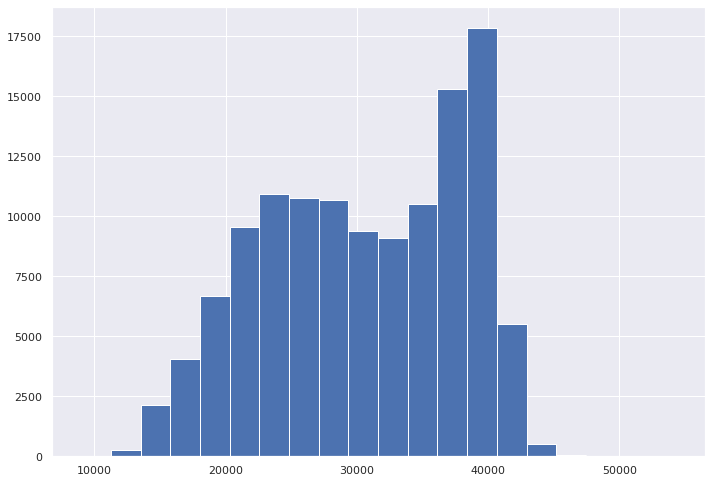

In [139]:
df_3[df_3.CLASS_3==1138].GW_TOT_3.hist(bins=20)

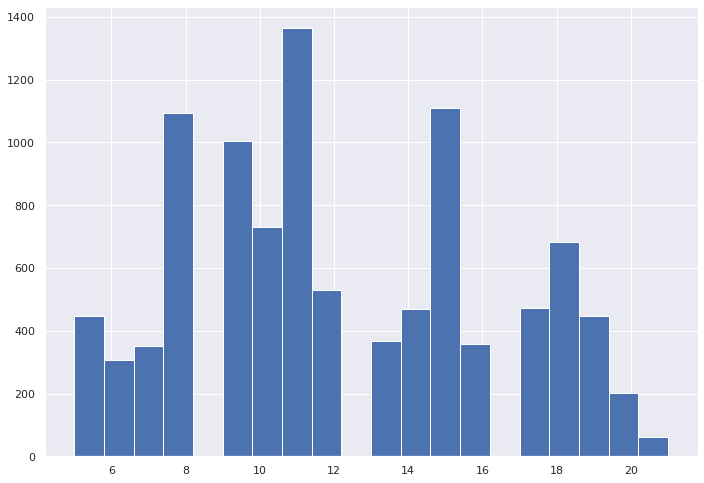

In [129]:
samples.Hour.hist(bins=20)

In [113]:
samples.head()

,IVT_1,IVT_2,IVT_3,CLASS_1,CLASS_2,CLASS_3,GW_TOT_1,GW_TOT_2,GW_TOT_3,LENTH_1,LENTH_2,LENTH_3,SPEED_1,SPEED_2,SPEED_3,AX_1,AX_2,AX_3,Weekday,Hour
0,22.136942,1.266531,2.333360,1127,1127,1138,34182,36915,41619,1934,1691,1442,8733,8846,8429,4,4,5,3,20
1,4.707155,1.444549,1.333660,1138,1138,1138,27379,40144,34380,1623,1427,1650,8627,9004,9051,5,5,5,2,8
2,5.696622,2.320126,1.207388,1138,1138,1138,39842,30983,37505,1590,1621,1802,8622,8831,8529,5,5,5,5,11
3,33.468706,1.272718,2.138568,1128,11,11117,16626,11130,14822,1541,1131,1858,8999,8140,8624,4,3,4,3,17
4,14.003872,1.260878,1.223808,1128,1127,1127,21549,21097,23042,1663,1902,2051,8342,8770,8523,4,4,4,1,19


In [107]:
#Comparing 3, 4 and 5
def ctgan_comp(df, length):
    
    df_len = df[df.Length == length]
    
    ctgan_3 = CTGANSynthesizer.load('CTGAN_Models/ctgan_length{}_dayall_epoch300.pkl'.format(length))

    samples = ctgan_3.sample(int((df_len.shape[0])*0.8))
    
    drop_cols = list(set(df_len.columns) ^ set(samples.columns))
    df_len = df_len.drop(columns=drop_cols)
    
    #Fix length
    rename = {}
    for col in df_len.columns:
        if col[0] == 'L':
            rename[col] = 'LENGTH_{}'.format(col[-1])
    
    samples.rename(columns=rename, inplace=True)
    df_len.rename(columns=rename,inplace=True)
    
    
    #Plotting
    
    fig, axes = plt.subplots(3, 2, figsize=(20, 20), constrained_layout=True)
    fig.suptitle('Synthetic vs Real Distributions, Length {}'.format(length))
    
    df_len = df_len[samples.columns]
    
    #heatmaps
    sns.heatmap(samples.corr(), ax=axes[0, 0])
    axes[0, 0].set_title('Synthetic Autocross-correlation Heatmap')
    sns.heatmap(df_len.corr(), ax=axes[0, 1])
    axes[0, 1].set_title('Real Autocross-correlation Heatmap')
    
    #violin plots
    tmp = pd.DataFrame({'Real': df_len['SPEED_2']/100, 'Synthetic': samples['SPEED_2']/100})
    sns.violinplot(data=tmp, ax=axes[1, 0])
    axes[1, 0].set_title('Speed of Second Truck from Real and Synthesized')

    axes[1, 0].yaxis.grid(True)
    axes[1, 0].set_ylabel('Speed of Vehicle (km/h)')
    
    tmp = pd.DataFrame({'Real': df_len['IVT_2'], 'Synthetic': samples['IVT_2']})
    sns.violinplot(data=tmp, ax=axes[1, 1])
    axes[1, 1].set_title('IVT of 2nd Truck in Line')

    axes[1, 1].yaxis.grid(True)
    axes[1, 1].set_ylabel('IVT in seconds')
    
    tmp = pd.DataFrame({'Real': df_len['GW_TOT_2']/1000, 'Synthetic': samples['GW_TOT_2']/1000})
    sns.violinplot(data=tmp, ax=axes[2, 0])
    axes[2, 0].set_title('Weight of 2nd Truck from Real and Synthesized')

    axes[2, 0].yaxis.grid(True)
    axes[2, 0].set_ylabel('Weight of Vehicle (tons)')
    
    tmp = pd.DataFrame({'Real': df_len['LENGTH_2']/100, 'Synthetic': samples['LENGTH_2']/100})
    sns.violinplot(data=tmp, ax=axes[2, 1])
    axes[2, 1].set_title('Length of 2nd Truck from Real and Synthesized')

    axes[2, 1].yaxis.grid(True)
    axes[2, 1].set_ylabel('Length of Vehicle (m)')
    
    print(df_len.GW_TOT_2.mean())
    print(samples.GW_TOT_2.mean())
    print(df_len.LENGTH_2.mean())
    print(samples.LENGTH_2.mean())
    
    #Map classes
    #samples['CLASS_2'] = samples.CLASS_2.astype(str)
    #df_len['CLASS_2'] = df_len.CLASS_2.astype(str)
    #samples['AX_2'] = samples.replace({'CLASS_2':ax_mapping}).CLASS_1
    
    #Classifier testing
    classes = []
    fake = []
    real = []
    for col in df_len.columns:
        if col[0] == 'C':
            print('Class: {}'.format(col[-1]))
            f =MulticlassDecisionTreeClassifier.compute(df_len, samples, target=col)
            print(f)
            fake.append(f)
            train = df_len.sample(int(len(df_len) * 0.75))

            test = df_len[~df_len.index.isin(train.index)]
            r = MulticlassDecisionTreeClassifier.compute(test, train, target=col)
            real.append(r)
            print(r)
    
    print(sum(fake) / float(len(fake)))
    print(sum(real) / float(len(real)))

In [104]:
ctgan_comp(df, 3)

Class: 1
0.35206429636238284
0.6092853681730294
Class: 2
0.364406314880747
0.6241559918119371
Class: 3
0.3707195710157556
0.6025195696297114
0.3623967274196285
0.611986976538226


In [105]:
ctgan_comp(df, 4)

Class: 1
0.28096458037891703
0.5543671891479589
Class: 2
0.30788514430975805
0.6128223964906537
Class: 3
0.3239687510484851
0.6182324153518596
Class: 4
0.29842563108385234
0.6712197471049764
0.3028110267052531
0.6141604370238621


26693.85409489272
26725.23473859172
1515.8577818071924
1494.4660773647627
Class: 1
0.13639806101262436
0.6339362157340148
Class: 2
0.1561541032830093
0.6056649065394573
Class: 3
0.15153241880088417
0.6409796539874327
Class: 4
0.1617121212529046
0.6739229218793886
Class: 5
0.17830829319059407
0.6580446582421605
0.1568209995080033
0.6425096712764908


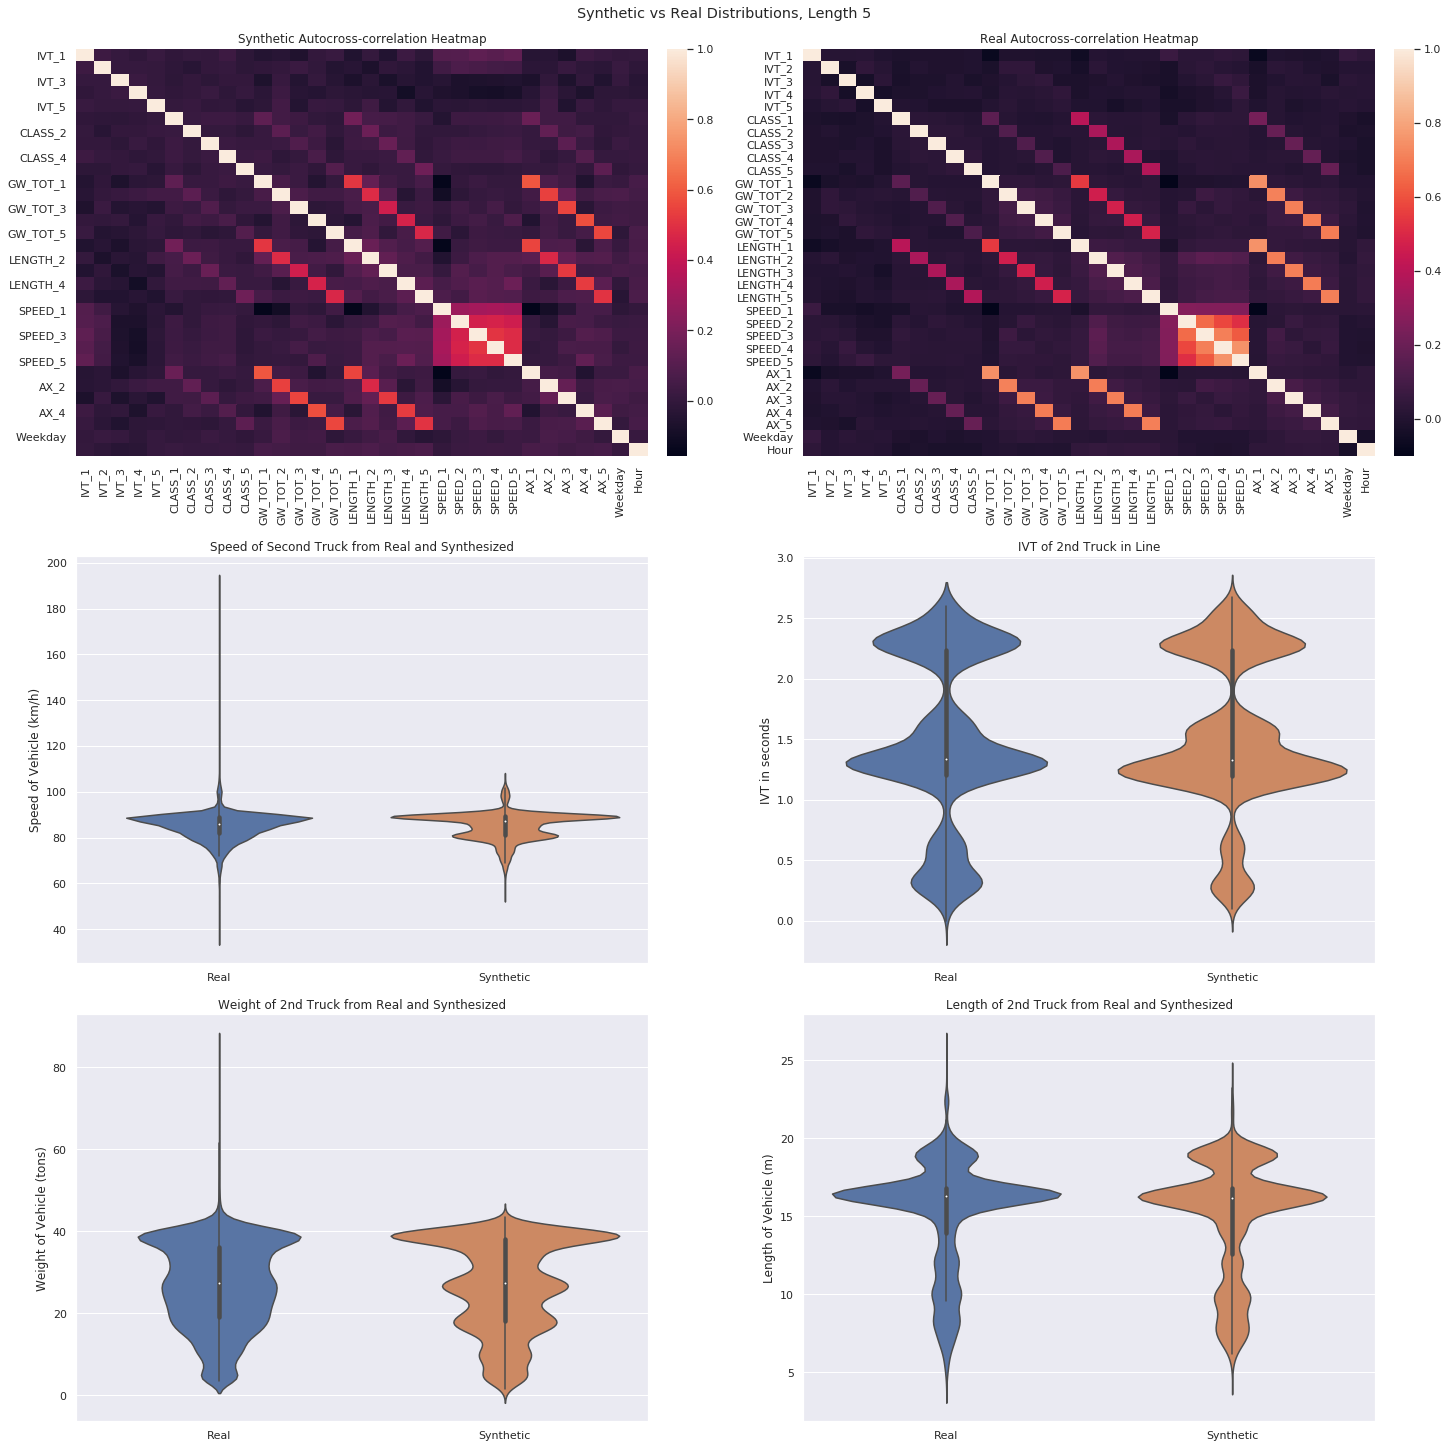

In [108]:
ctgan_comp(df, 5)

In [72]:
ax_mapping = {
    '11' : 2,
    '12' : 3,
    '22' : 4,
    '23' : 5,
    '41' : 5,
    '42' : 6,
    '43' : 7,
    '44' : 8,
    '45' : 9,
    '46' : 8,
    '111' : 3,
    '122' : 5,
    '1127' : 4,
    '1128' : 4,
    '1138' : 5,
    '1238' : 6,
    '11117' : 4,
    '11127' : 5,
    '12117' : 5
}

In [71]:
df.groupby('CLASS_1').AX_1.value_counts()

CLASS_1  AX_1
11       2       1697433
12       3        501871
22       4        361120
23       5         52064
41       5           895
42       6             3
43       7           388
44       8            31
45       9            29
46       8            58
99       2        752237
         3        451196
         4        315528
         5        164188
         6         58181
         7         14551
         8          6909
         9          2051
111      3         57485
122      5        339860
1127     4        315802
1128     4        760824
1138     5       3902131
1238     6         13054
11117    4        283536
11127    5         38314
12117    5        212786
Name: AX_1, dtype: int64

In [11]:
ctgan_5.fit(df_5, discrete_columns)


/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/pumford/.conda/envs/traffic/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_components=10 as 

Epoch 1, Loss G: 2.1885, Loss D: -0.6336
Epoch 2, Loss G: 1.3979, Loss D: 0.1097
Epoch 3, Loss G: 1.1678, Loss D: 0.0679
Epoch 4, Loss G: 1.2471, Loss D: -0.2033
Epoch 5, Loss G: 1.2581, Loss D: -0.4537
Epoch 6, Loss G: 0.5734, Loss D: 0.1689
Epoch 7, Loss G: 0.4742, Loss D: 0.0758
Epoch 8, Loss G: -0.1948, Loss D: 0.1428
Epoch 9, Loss G: -0.2161, Loss D: 0.0361
Epoch 10, Loss G: -0.4231, Loss D: 0.1019
Epoch 11, Loss G: -0.8743, Loss D: 0.2806
Epoch 12, Loss G: -0.9493, Loss D: 0.0027
Epoch 13, Loss G: -1.1405, Loss D: -0.0045
Epoch 14, Loss G: -1.3314, Loss D: 0.1689
Epoch 21, Loss G: -2.4928, Loss D: -0.0726
Epoch 22, Loss G: -2.2256, Loss D: -0.1311
Epoch 23, Loss G: -2.7572, Loss D: 0.0915
Epoch 24, Loss G: -2.6487, Loss D: 0.0436
Epoch 25, Loss G: -2.4495, Loss D: 0.0710
Epoch 26, Loss G: -2.8472, Loss D: -0.2982
Epoch 27, Loss G: -2.6085, Loss D: -0.0050
Epoch 28, Loss G: -2.7623, Loss D: 0.1159
Epoch 29, Loss G: -2.7161, Loss D: -0.1608
Epoch 30, Loss G: -2.8941, Loss D: 0.0544

Epoch 197, Loss G: -1.0230, Loss D: -0.0231
Epoch 198, Loss G: -1.0655, Loss D: -0.1501
Epoch 199, Loss G: -1.2845, Loss D: -0.2093
Epoch 200, Loss G: -1.1884, Loss D: -0.1184
Epoch 201, Loss G: -0.8443, Loss D: -0.1108
Epoch 202, Loss G: -0.8858, Loss D: -0.0798
Epoch 203, Loss G: -1.1136, Loss D: -0.0823
Epoch 207, Loss G: -0.5284, Loss D: -0.2682
Epoch 208, Loss G: -1.0717, Loss D: -0.2940
Epoch 209, Loss G: -0.8609, Loss D: -0.2788
Epoch 210, Loss G: -0.6261, Loss D: 0.1992
Epoch 211, Loss G: -0.9027, Loss D: 0.1338
Epoch 212, Loss G: -0.8650, Loss D: -0.0742
Epoch 213, Loss G: -0.7657, Loss D: -0.1260
Epoch 214, Loss G: -0.9032, Loss D: -0.0747
Epoch 215, Loss G: -0.7115, Loss D: -0.0726
Epoch 216, Loss G: -0.8633, Loss D: -0.2130
Epoch 217, Loss G: -1.1807, Loss D: 0.1892
Epoch 218, Loss G: -0.8182, Loss D: -0.2522
Epoch 219, Loss G: -1.3057, Loss D: 0.1705
Epoch 220, Loss G: -1.0985, Loss D: 0.0793
Epoch 221, Loss G: -1.1051, Loss D: -0.2567
Epoch 222, Loss G: -0.9793, Loss D: 0

In [12]:
ctgan_5.save('ctgan_length5_epoch300.pkl')

In [13]:
samples = ctgan_5.sample(10000)

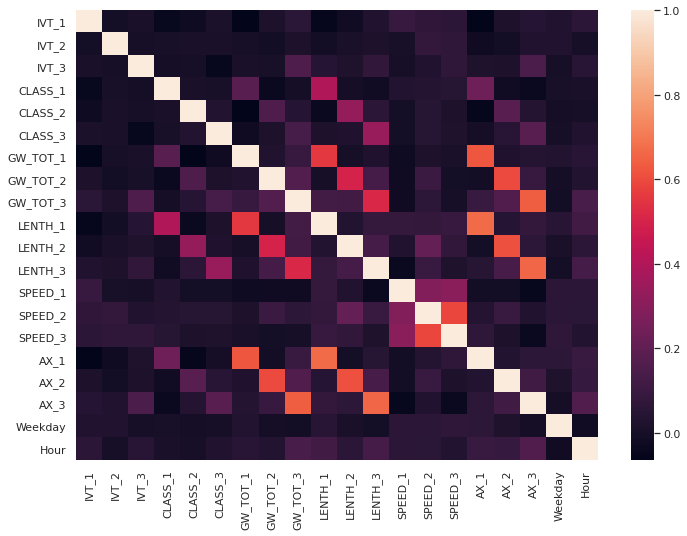

In [90]:
sns.heatmap(samples.corr())

In [38]:
no_col = []
for col in df.columns:
    if col[-1].isdigit() and int(col[-1]) > 4 and col[1] != 'A':
        no_col.append(col)

df_sm = df.drop(columns=no_col)

In [9]:
df_3 = df_sm[df_sm.Length == 3]
df_3 = df_3.drop(columns='Length')

In [39]:
df_4 = df_sm[df_sm.Length == 4]
df_4 = df_4.drop(columns='Length')

In [31]:
len(df_4)

62158

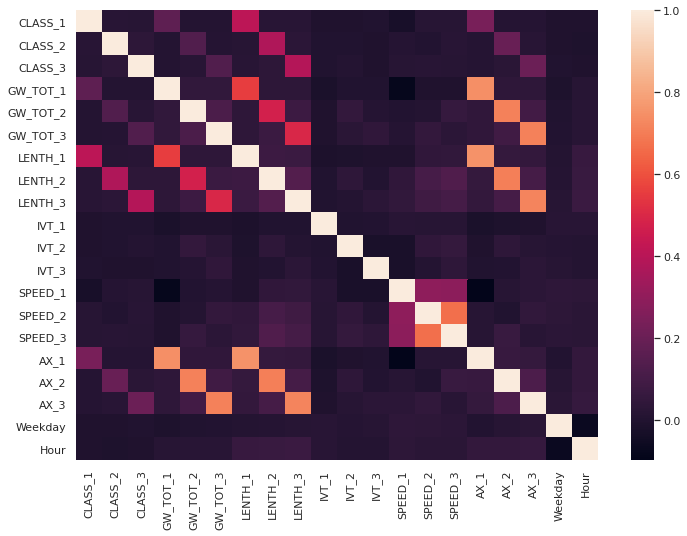

In [97]:
sns.heatmap(df_3.corr())

In [13]:
import sdmetrics

In [5]:
sdmetrics.__version__

'0.1.1'

In [17]:
df_3 = df_3.drop(columns=['AX_W_1', 'AX_W_2', 'AX_W_3', 'AX_DIST_1', 'AX_DIST_2', 'AX_DIST_3'])

In [40]:
df_4 = df_4.drop(columns=['AX_W_1', 'AX_W_2', 'AX_W_3', 'AX_DIST_1', 'AX_DIST_2', 'AX_DIST_3', 'AX_W_4', 'AX_DIST_4'])

In [41]:
df_4.columns

Index(['CLASS_1', 'CLASS_2', 'CLASS_3', 'CLASS_4', 'GW_TOT_1', 'GW_TOT_2',
       'GW_TOT_3', 'GW_TOT_4', 'LENTH_1', 'LENTH_2', 'LENTH_3', 'LENTH_4',
       'IVT_1', 'IVT_2', 'IVT_3', 'IVT_4', 'SPEED_1', 'SPEED_2', 'SPEED_3',
       'SPEED_4', 'AX_1', 'AX_2', 'AX_3', 'AX_4', 'Weekday', 'Hour'],
      dtype='object')

In [46]:
samples.columns

Index(['IVT_1', 'IVT_2', 'IVT_3', 'CLASS_1', 'CLASS_2', 'CLASS_3', 'GW_TOT_1',
       'GW_TOT_2', 'GW_TOT_3', 'LENTH_1', 'LENTH_2', 'LENTH_3', 'SPEED_1',
       'SPEED_2', 'SPEED_3', 'AX_1', 'AX_2', 'AX_3', 'Weekday', 'Hour'],
      dtype='object')

In [54]:
ctgan_4 = CTGANSynthesizer.load('CTGAN_Models/ctgan_length4_dayall_epoch300.pkl')

samples = ctgan_4.sample(50000)

MulticlassDecisionTreeClassifier.compute(df_4, samples, target='CLASS_4')

/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/torch/serialization.py:559: UserWarning: Couldn't retrieve source code for container of type Generator. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/torch/serialization.py:559: UserWarning: Couldn't retrieve source code for container of type Residual. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "
/home/pumford/.conda/envs/bridge/lib/python3.7/site-packages/torch/serialization.py:559: UserWarning: Couldn't retrieve source code for container of type Discriminator. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "


0.30653931722745587

In [55]:
train = df_4.sample(int(len(df_4) * 0.75))

test = df_4[~df_4.index.isin(train.index)]

MulticlassDecisionTreeClassifier.compute(test, train, target='CLASS_4')

0.5917891529414991

In [29]:
from sdmetrics.single_table import MulticlassDecisionTreeClassifier

MulticlassDecisionTreeClassifier.compute(df_3, samples, target='CLASS_2')

0.3614665837923176

In [23]:
from sdmetrics.single_table import MulticlassDecisionTreeClassifier

MulticlassDecisionTreeClassifier.compute(df_3, samples, target='CLASS_2')
train = df_3.sample(int(len(df_3) * 0.75))

test = df_3[~df_3.index.isin(train.index)]

MulticlassDecisionTreeClassifier.compute(test, train, target='CLASS_2')

0.6030634231408205

<AxesSubplot:>

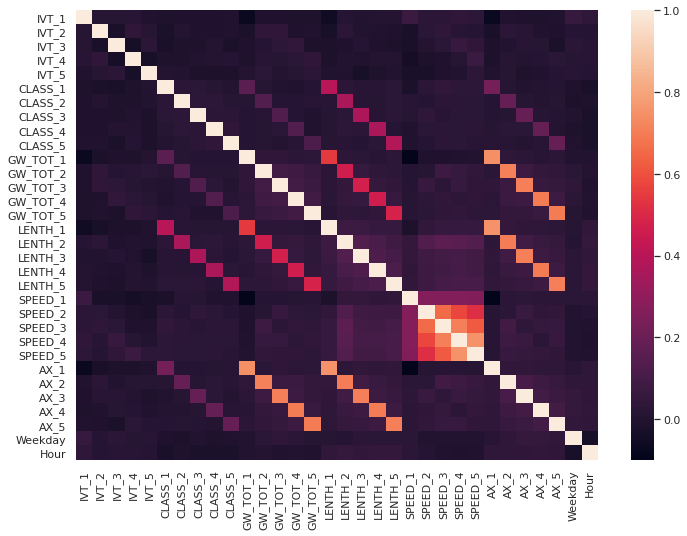

In [15]:
sns.heatmap(df_5.corr())

In [32]:
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=13)

In [17]:
tmp = pd.DataFrame({'Real': df_5['SPEED_1'], 'Fake': samples['SPEED_1']})

Text(0, 0.5, 'Speed of Vehicle')

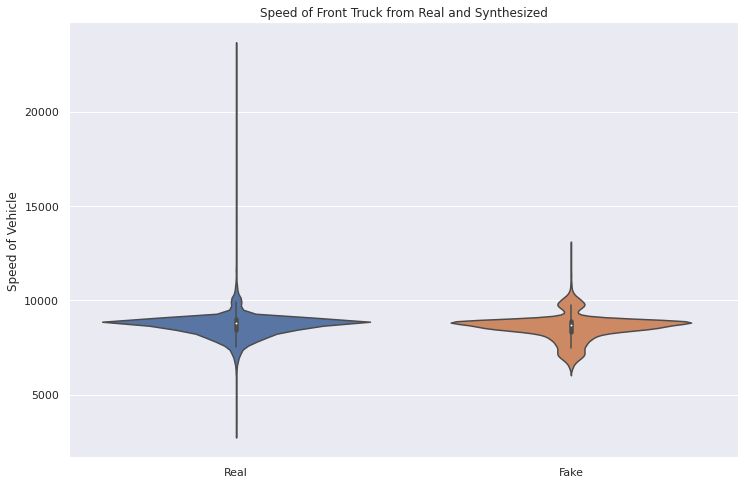

In [18]:
fig, axes = plt.subplots()
sns.violinplot(data=tmp, ax=axes)
axes.set_title('Speed of Front Truck from Real and Synthesized')

axes.yaxis.grid(True)
axes.set_ylabel('Speed of Vehicle')

Text(0, 0.5, 'IVT in seconds')

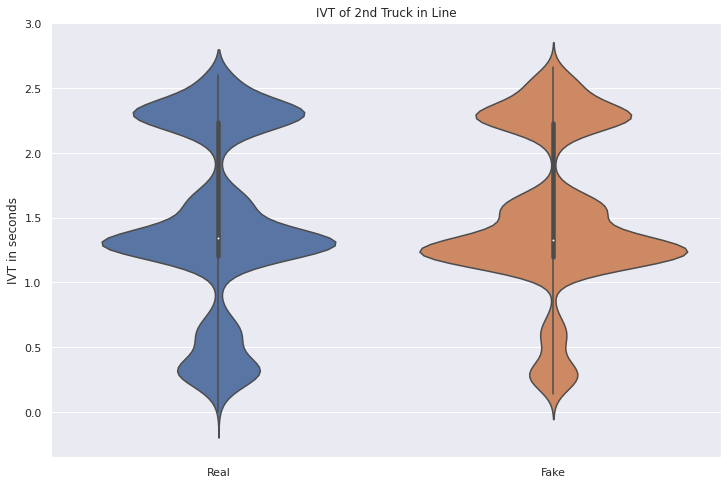

In [19]:
tmp = pd.DataFrame({'Real': df_5['IVT_2'], 'Fake': samples['IVT_2']})
fig, axes = plt.subplots()
sns.violinplot(data=tmp, ax=axes)
axes.set_title('IVT of 2nd Truck in Line')

axes.yaxis.grid(True)
axes.set_ylabel('IVT in seconds')

Text(0, 0.5, 'Weight of Vehicle')

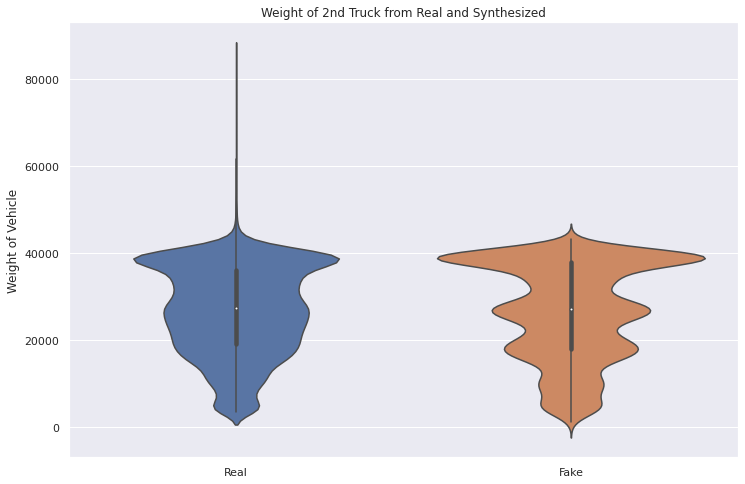

In [23]:
tmp = pd.DataFrame({'Real': df_5['GW_TOT_2'], 'Fake': samples['GW_TOT_2']})
fig, axes = plt.subplots()
sns.violinplot(data=tmp, ax=axes)
axes.set_title('Weight of 2nd Truck from Real and Synthesized')

axes.yaxis.grid(True)
axes.set_ylabel('Weight of Vehicle')

Text(0, 0.5, 'Length of Vehicle')

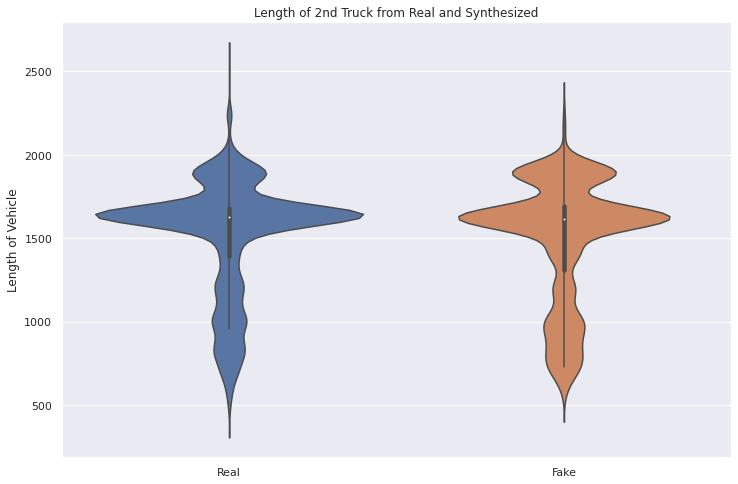

In [25]:
tmp = pd.DataFrame({'Real': df_5['LENTH_2'], 'Fake': samples['LENTH_2']})
fig, axes = plt.subplots()
sns.violinplot(data=tmp, ax=axes)
axes.set_title('Length of 2nd Truck from Real and Synthesized')

axes.yaxis.grid(True)
axes.set_ylabel('Length of Vehicle')

In [22]:
df_5.shape

(16545, 32)

### Platoons of size 4

In [4]:
from ctgan import CTGANSynthesizer

In [6]:
ctgan4 = CTGANSynthesizer.load('CTGAN_Models/ctgan_length4_dayall_epoch300.pkl')

In [7]:
samples = ctgan4.sample(10000)

In [8]:
samples.head()

,IVT_1,IVT_2,IVT_3,IVT_4,CLASS_1,CLASS_2,CLASS_3,CLASS_4,GW_TOT_1,GW_TOT_2,...,SPEED_1,SPEED_2,SPEED_3,SPEED_4,AX_1,AX_2,AX_3,AX_4,Weekday,Hour
0,7.246772,1.238444,2.360189,1.270153,1138,99,99,1138,21120,20196,...,8518,8736,8835,8924,5,2,4,5,3,15
1,3.680583,0.326544,1.313174,2.310141,11,1138,1138,1138,17837,27628,...,8320,8374,7484,7895,2,5,5,5,3,16
2,7.836484,2.174702,1.425494,2.349904,99,1128,12117,1138,19063,18604,...,8767,8362,7418,7324,2,4,2,5,3,16
3,9.699285,2.154275,1.249102,0.266496,1138,11117,11117,1128,32121,27757,...,8940,8879,8890,8453,5,4,4,4,4,18
4,3.741782,0.622687,1.655840,0.313452,1127,99,99,1138,30144,11320,...,8938,9026,9732,8823,4,4,3,5,3,7


In [10]:
#Load real platoon 4 data
import pandas as pd
plat4 = pd.read_pickle('CeneriData/cleaned_2003_2019_platoon.pkl')

In [12]:
df = plat4

In [13]:
ax_cols = []
for i in range(1, 10):
    ax_cols.append('{}_{}'.format('AX_W', i))
    #for j in range(0, 10):
        #ax_cols.append('{}_{}_{}'.format('AX_W', i, j))

for i in range(1, 10):
    ax_cols.append('{}_{}'.format('AX_DIST', i))
    #for j in range(0, 9):
        #ax_cols.append('{}_{}_{}'.format('AX_DIST', i, j))

df_noax = df.drop(columns = ax_cols)

no_col = []
for col in df_noax.columns:
    if col[-1].isdigit() and int(col[-1]) > 5:
        no_col.append(col)

df_sm = df_noax.drop(columns=no_col)

df_sm = df_sm[df_sm.Length <= 5]

In [14]:
df_4 = df_sm[df_sm.Length == 4]

In [15]:
ivt_list = ['IVT_1', 'IVT_2', 'IVT_3', 'IVT_4', 'IVT_5']
df_int = df_4.drop(columns=ivt_list).astype(int)
df_sm = pd.concat([df_4[ivt_list], df_int], axis=1)

In [17]:
df_sm = df_sm.drop(columns=['IVT_5', 'CLASS_5', 'SPEED_5', 'AX_5'])

In [19]:
df_sm.columns

Index(['IVT_1', 'IVT_2', 'IVT_3', 'IVT_4', 'CLASS_1', 'CLASS_2', 'CLASS_3',
       'CLASS_4', 'GW_TOT_1', 'GW_TOT_2', 'GW_TOT_3', 'GW_TOT_4', 'GW_TOT_5',
       'LENTH_1', 'LENTH_2', 'LENTH_3', 'LENTH_4', 'LENTH_5', 'SPEED_1',
       'SPEED_2', 'SPEED_3', 'SPEED_4', 'AX_1', 'AX_2', 'AX_3', 'AX_4',
       'Length', 'Weekday', 'Hour'],
      dtype='object')

In [20]:
df_sm = df_sm.drop(columns=['Length', 'GW_TOT_5', 'LENTH_5'])

<AxesSubplot:>

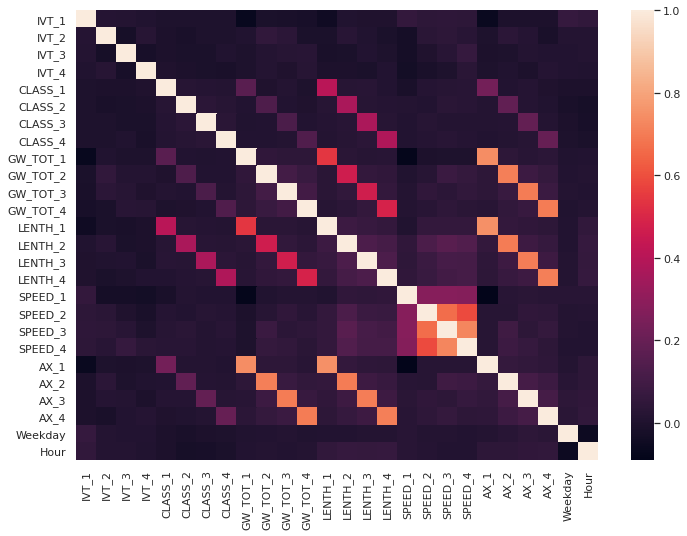

In [23]:
sns.heatmap(df_sm.corr())

<AxesSubplot:>

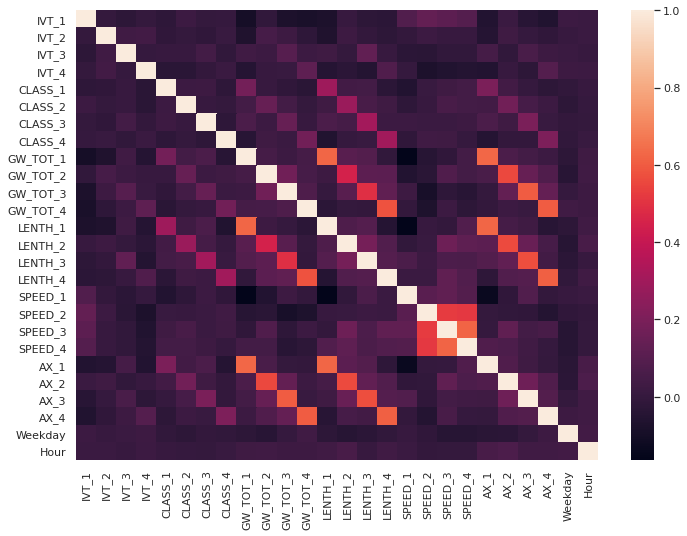

In [24]:
sns.heatmap(samples.corr())

In [26]:
samples.head()

,IVT_1,IVT_2,IVT_3,IVT_4,CLASS_1,CLASS_2,CLASS_3,CLASS_4,GW_TOT_1,GW_TOT_2,...,SPEED_1,SPEED_2,SPEED_3,SPEED_4,AX_1,AX_2,AX_3,AX_4,Weekday,Hour
0,7.246772,1.238444,2.360189,1.270153,1138,99,99,1138,21120,20196,...,8518,8736,8835,8924,5,2,4,5,3,15
1,3.680583,0.326544,1.313174,2.310141,11,1138,1138,1138,17837,27628,...,8320,8374,7484,7895,2,5,5,5,3,16
2,7.836484,2.174702,1.425494,2.349904,99,1128,12117,1138,19063,18604,...,8767,8362,7418,7324,2,4,2,5,3,16
3,9.699285,2.154275,1.249102,0.266496,1138,11117,11117,1128,32121,27757,...,8940,8879,8890,8453,5,4,4,4,4,18
4,3.741782,0.622687,1.655840,0.313452,1127,99,99,1138,30144,11320,...,8938,9026,9732,8823,4,4,3,5,3,7


In [29]:
del plat4

In [30]:
samples.groupby('CLASS_1').AX_1.value_counts()

CLASS_1  AX_1
11       2       1150
         3         81
         4         48
         5         42
         6          3
                 ... 
12117    6          8
         2          3
         3          3
         7          3
         8          1
Name: AX_1, Length: 112, dtype: int64

In [31]:
df_sm.groupby('CLASS_1').AX_1.value_counts()

CLASS_1  AX_1
11       2        8205
12       3        2365
22       4        2327
23       5         309
41       5           7
43       7           2
44       8           1
46       8           1
99       2        3281
         3        1947
         4        1520
         5        1161
         6         402
         7          67
         8          46
         9           5
111      3         318
122      5        2190
1127     4        2664
1128     4        4847
1138     5       27058
1238     6          72
11117    4        1707
11127    5         263
12117    5        1393
Name: AX_1, dtype: int64

Text(0, 0.5, 'Length of Vehicle')

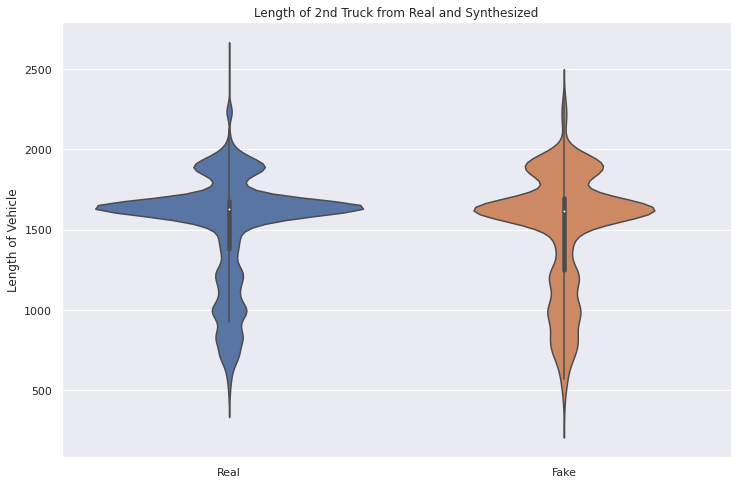

In [33]:
tmp = pd.DataFrame({'Real': df_sm['LENTH_2'], 'Fake': samples['LENTH_2']})
fig, axes = plt.subplots()
sns.violinplot(data=tmp, ax=axes)
axes.set_title('Length of 2nd Truck from Real and Synthesized')

axes.yaxis.grid(True)
axes.set_ylabel('Length of Vehicle')

In [38]:
df_sm[df_sm['CLASS_1'] == 1138]

,IVT_1,IVT_2,IVT_3,IVT_4,CLASS_1,CLASS_2,CLASS_3,CLASS_4,GW_TOT_1,GW_TOT_2,...,SPEED_1,SPEED_2,SPEED_3,SPEED_4,AX_1,AX_2,AX_3,AX_4,Weekday,Hour
917,108.345739,1.553073,1.359373,0.376889,1138,11,1138,1128,29408,11133,...,9200,8200,8300,8100,5,2,5,4,3,17
1987,4.319273,2.319682,1.334607,1.170683,1138,1138,1138,122,14885,14272,...,8800,8800,8900,8200,5,5,5,5,4,19
1991,90.340674,0.380884,0.313136,2.515674,1138,1138,1138,12,35019,30830,...,8900,8600,8800,8600,5,5,5,3,4,19
1998,69.332552,2.331200,2.315591,0.312276,1138,1138,1138,1138,26040,34845,...,8700,9000,8800,8700,5,5,5,5,4,19
2015,95.333379,0.299227,1.293091,0.215953,1138,1138,1138,99,17337,26335,...,8700,8800,8800,8600,5,5,5,5,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10299424,20.376527,2.218025,2.271342,2.131792,1138,1138,1138,11117,39910,37720,...,9100,7900,7900,7700,5,5,5,4,2,14
10299982,32.290098,2.144571,1.289659,2.322072,1138,12117,1138,1138,35930,21940,...,8200,8400,8200,8300,5,5,5,5,2,17
10301138,3.221558,2.291571,1.311765,1.319349,1138,1138,1138,1138,43430,15150,...,7700,8400,8500,8600,5,5,5,5,3,10
10301550,36.331488,1.546127,0.244000,0.247789,1138,22,1138,1128,35150,16030,...,8600,7900,7600,7600,5,4,5,4,3,13


<AxesSubplot:>

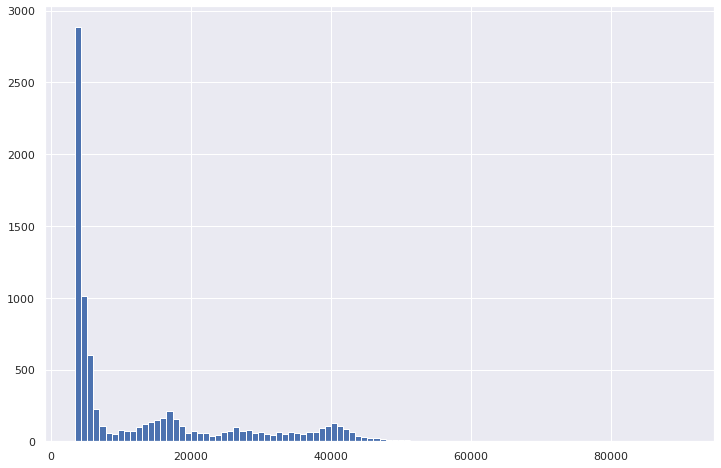

In [46]:
df_sm[df_sm['CLASS_1'] == 99].GW_TOT_1.hist(bins=100)

<AxesSubplot:>

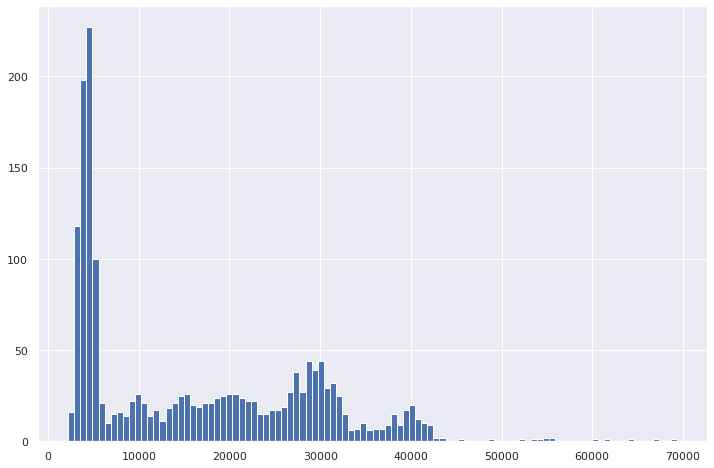

In [47]:
samples[samples['CLASS_1'] == 99].GW_TOT_1.hist(bins=100)

Text(0, 0.5, 'Length of Vehicle')

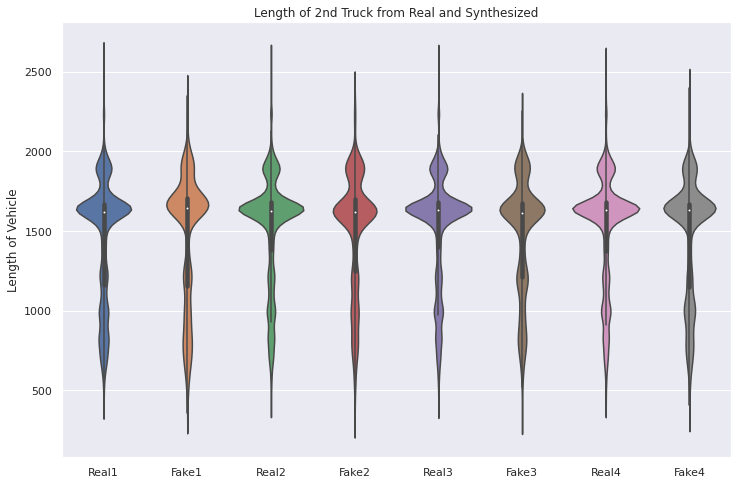

In [48]:
tmp = pd.DataFrame({'Real1': df_sm['LENTH_1'], 'Fake1': samples['LENTH_1'],
                   'Real2': df_sm['LENTH_2'], 'Fake2': samples['LENTH_2'],
                   'Real3': df_sm['LENTH_3'], 'Fake3': samples['LENTH_3'],
                   'Real4': df_sm['LENTH_4'], 'Fake4': samples['LENTH_4']})
fig, axes = plt.subplots()
sns.violinplot(data=tmp, ax=axes)
axes.set_title('Length of 2nd Truck from Real and Synthesized')

axes.yaxis.grid(True)
axes.set_ylabel('Length of Vehicle')

Text(0, 0.5, 'Weight of Vehicle')

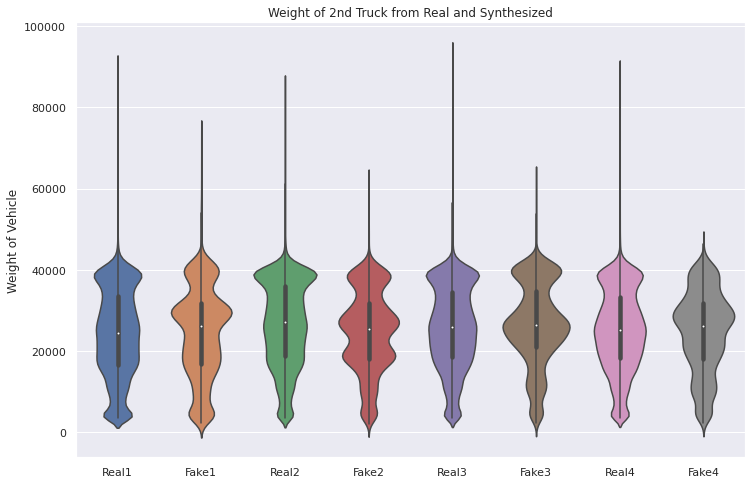

In [51]:
tmp = pd.DataFrame({'Real1': df_sm['GW_TOT_1'], 'Fake1': samples['GW_TOT_1'],
                   'Real2': df_sm['GW_TOT_2'], 'Fake2': samples['GW_TOT_2'],
                   'Real3': df_sm['GW_TOT_3'], 'Fake3': samples['GW_TOT_3'],
                   'Real4': df_sm['GW_TOT_4'], 'Fake4': samples['GW_TOT_4']})
fig, axes = plt.subplots()
sns.violinplot(data=tmp, ax=axes)
axes.set_title('Weight of 2nd Truck from Real and Synthesized')

axes.yaxis.grid(True)
axes.set_ylabel('Weight of Vehicle')

In [53]:
df_sm[['GW_TOT_1', 'GW_TOT_2', 'GW_TOT_3', 'GW_TOT_4']].mean()

GW_TOT_1    24347.520207
GW_TOT_2    26540.465652
GW_TOT_3    25777.287316
GW_TOT_4    25131.571672
dtype: float64

In [54]:
samples[['GW_TOT_1', 'GW_TOT_2', 'GW_TOT_3', 'GW_TOT_4']].mean()

GW_TOT_1    24553.9874
GW_TOT_2    24786.4932
GW_TOT_3    26548.5096
GW_TOT_4    24733.7126
dtype: float64